# Explore here

## Importar librerías, importar el data set y ver su estructura

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importamos las herramientas para el preprocesamiento y el modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', sep=";")

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Estadísticas para las columnas numéricas

In [3]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Valores únicos en las columnas de texto

In [4]:
for column in df.select_dtypes(include='object').columns:
    print(f"\nColumna '{column}':")
    print(df[column].value_counts())


Columna 'job':
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

Columna 'marital':
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

Columna 'education':
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

Columna 'default':
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

Columna 'housing':
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

Columna 'loan':
loan
no         33950
yes         6

## Vamos a comprobar si hay valores nulos

In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

- No hay valores nulos
- La columna 'duration' solo la sabemos despues de hacer la llamada, por lo que la eliminaré ya que como queremos predecir si alguien va a contratar el servicio antes de llamar, no podemos utilizar esa variable

In [6]:
df = df.drop('duration', axis=1)

- La columna 'y' es la que queremos predecir, pero si está en formato string, no la podemos predecir así, por lo que voy a convertirla a una variable numérica. Como tiene pocos valores que es 'sí' o 'no', no utilizaré one-hot-encoding, solamente utilizaré la función map para cambiar los valores

In [7]:
df['y'] = df['y'].map({'no': 0, 'yes': 1})

## Separar los datos con train y test

In [8]:
X = df.drop('y', axis=1)
y = df['y']

- Voy a dividir en variables las características numéricas y categóricas

In [9]:
num_cols = X.select_dtypes(include=np.number).columns
cat_cols = X.select_dtypes(include='object').columns

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

- Ahora vamos a escalar las variables numéricas

In [11]:
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

- Como las otras características categóricas si tienen más variables voy a utilziar one-hot-encoding en estas

In [12]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
cols_train = encoder.fit_transform(X_train[cat_cols])
cols_test = encoder.transform(X_test[cat_cols])

- Ahora vamos a crear nuevos datasets con las columnas que fueron extraídas con el encoder

In [13]:
caracteristicas_encoded = encoder.get_feature_names_out(cat_cols)
X_train_encoded_df = pd.DataFrame(cols_train, columns=caracteristicas_encoded, index=X_train.index)
X_test_encoded_df = pd.DataFrame(cols_test, columns=caracteristicas_encoded, index=X_test.index)

# Y las unimos con las numéricas

X_train = pd.concat([X_train[num_cols], X_train_encoded_df], axis=1)
X_test = pd.concat([X_test[num_cols], X_test_encoded_df], axis=1)

In [14]:
X_train.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
25611,0.863739,0.522981,0.196584,-0.350127,-0.114858,-0.648967,-0.322269,0.288964,0.398990,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
26010,-0.289722,-0.203688,0.196584,1.653813,-0.114858,-0.648967,-0.322269,0.288964,0.398990,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
40194,3.651268,-0.567023,0.196584,-0.350127,-1.133161,1.103451,0.045048,-1.583296,-2.420139,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
297,-0.385843,-0.203688,0.196584,-0.350127,0.648868,0.721890,0.887717,0.713535,0.332723,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
36344,1.824956,-0.203688,0.196584,-0.350127,-1.896888,-1.058152,-0.062987,-1.357472,-1.252175,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


- Ya aquí podemos ver que no hay ninguna variable categórica y todas están bien configuradas

## Ver la distribución de los datos en la variable objetivo para ver si está desbalanceada o no

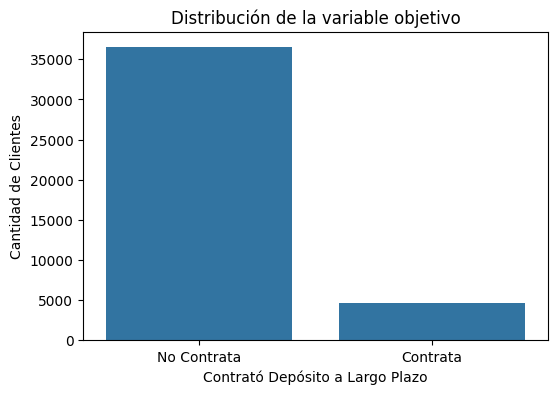

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Distribución de la variable objetivo')
plt.xticks([0, 1], ['No Contrata', 'Contrata'])
plt.ylabel('Cantidad de Clientes')
plt.xlabel('Contrató Depósito a Largo Plazo')
plt.show()

- Y efectivamente existe un desbalanceo por tantos no

## Aquí ya entrenamos el modelo

In [16]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

- Vamos a ver qué tal predice

In [17]:
y_pred = model.predict(X_test)

- Con esta función nos da la precisión, recall, f1-score y support

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.69      0.22      0.33       928

    accuracy                           0.90      8238
   macro avg       0.80      0.60      0.64      8238
weighted avg       0.88      0.90      0.88      8238



- Y aquí vemos que tiene buena precisión en promedio, un 80% de acierto, en recall tenemos un 60% lo cual es bajo y también en f1-score. Esto se debe a que las clases de la variable objetivo tienen desbalanceo.

## Optimización del modelo

- Vamos a crear el objeto grid_search y sus parámetros

In [22]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'class_weight': [None, 'balanced'],
    'solver': ['liblinear', 'lbfgs']}

grid_search = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

- Y ahora va a iniciar la búsqueda

In [23]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[CV] END .......C=0.001, class_weight=None, solver=liblinear; total time=   0.1s
[CV] END .......C=0.001, class_weight=None, solver=liblinear; total time=   0.1s
[CV] END .......C=0.001, class_weight=None, solver=liblinear; total time=   0.1s
[CV] END .......C=0.001, class_weight=None, solver=liblinear; total time=   0.1s
[CV] END ...........C=0.001, class_weight=None, solver=lbfgs; total time=   0.1s
[CV] END .......C=0.001, class_weight=None, solver=liblinear; total time=   0.1s
[CV] END ...........C=0.001, class_weight=None, solver=lbfgs; total time=   0.1s
[CV] END ...........C=0.001, class_weight=None, solver=lbfgs; total time=   0.1s
[CV] END ...........C=0.001, class_weight=None, solver=lbfgs; total time=   0.1s
[CV] END ...........C=0.001, class_weight=None, solver=lbfgs; total time=   0.1s
[CV] END ...C=0.001, class_weight=balanced, solver=liblinear; total time=   0.1s
[CV] END ...C=0.001, class_weight=balanced, solver=liblinear; total time=   0.1s
[CV] END ...C=0.001, class_w

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='roc_auc', verbose=2)

- Estos son los mejores parámetros encontrados:
- Y abajo el mejor score encontrado

In [27]:
grid_search.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'solver': 'liblinear'}

In [28]:
grid_search.best_score_

np.float64(0.7901092495212175)

In [30]:
mejor_modelo = grid_search.best_estimator_

- Y ahora vamos a ver las predicciones con el modelo optimizado

In [31]:
y_pred_grid = mejor_modelo.predict(X_test)
y_pred_proba_grid = mejor_modelo.predict_proba(X_test)[:, 1]

In [33]:
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      7310
           1       0.37      0.65      0.47       928

    accuracy                           0.83      8238
   macro avg       0.66      0.75      0.68      8238
weighted avg       0.88      0.83      0.85      8238



- Vemos que hubo una mejora en los valores promedio de recall y f1-score pero en precisión bajó en la clase '1' y subió a la clase '0' por lo que no nos benefició utilizar el grid search ya que en recall y en f1-score sí subió pero subió muy pocos puntos.

- Ahora vamos a hacer lo mismo pero con el random search
- Lo único que cambiará será que vamos a importar unos parámetros para este grid

In [35]:
from scipy.stats import uniform, loguniform

param_distributions = {
    'C': loguniform(0.001, 100),
    'class_weight': [None, 'balanced'],
    'solver': ['liblinear', 'lbfgs']}

random_search = RandomizedSearchCV(LogisticRegression(random_state=42, max_iter=1000), param_distributions, n_iter=50, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END C=0.0745934328572655, class_weight=None, solver=liblinear; total time=   0.2s
[CV] END C=0.0745934328572655, class_weight=None, solver=liblinear; total time=   0.2s
[CV] END C=0.0745934328572655, class_weight=None, solver=liblinear; total time=   0.2s
[CV] END C=0.0745934328572655, class_weight=None, solver=liblinear; total time=   0.2s
[CV] END C=0.0745934328572655, class_weight=None, solver=liblinear; total time=   0.2s
[CV] END C=4.5705630998014515, class_weight=None, solver=liblinear; total time=   0.3s
[CV] END C=4.5705630998014515, class_weight=None, solver=liblinear; total time=   0.4s
[CV] END C=4.5705630998014515, class_weight=None, solver=liblinear; total time=   0.5s
[CV] END C=4.5705630998014515, class_weight=None, solver=liblinear; total time=   0.6s
[CV] END C=0.006026889128682512, class_weight=None, solver=liblinear; total time=   0.1s
[CV] END C=4.5705630998014515, class_weight=None, solver=liblinear

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(max_iter=1000, random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x72cee415ec10>,
                                        'class_weight': [None, 'balanced'],
                                        'solver': ['liblinear', 'lbfgs']},
                   random_state=42, scoring='roc_auc', verbose=2)

In [36]:
random_search.best_params_

{'C': np.float64(0.08777815504719653),
 'class_weight': 'balanced',
 'solver': 'liblinear'}

In [37]:
random_search.best_score_

np.float64(0.7901120111522628)

In [41]:
mejor_modelo = random_search.best_estimator_

In [42]:
y_pred_random = mejor_modelo.predict(X_test)
y_pred_proba_random = mejor_modelo.predict_proba(X_test)[:, 1]

In [43]:
print(classification_report(y_test, y_pred_random))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      7310
           1       0.37      0.65      0.47       928

    accuracy                           0.83      8238
   macro avg       0.66      0.75      0.68      8238
weighted avg       0.88      0.83      0.85      8238



- Obtuve los mismos resultados con el random que con el el search, lo cual se me hace raro porque son diferentes hiperparámetros. Aun así se obtienen mejores resultados con el modelo "básico" ya que tenemos más precisión en la clase "1" que es la que nos interesaría predecir más que la clase "0".